

<h1 style="font-size:30px;color:black;text-align:center">                   An analysis of the most popular repos on Github[incomplete]</h1>
<img src="https://kanbanize.com/blog/wp-content/uploads/2014/11/GitHub.jpg" alt="github" width=50% height=50%>
<hr>
_Areas of focus include: Type of repo, Size, Metrics of popularity, Languages used, Level of activity_

_Data Source: https://www.kaggle.com/chasewillden/topstarredopensourceprojects _


In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')


In [225]:
git_df = pd.read_csv("topstarredopensourceprojects/TopStaredRepositories.csv", parse_dates=['Last Update Date'], dayfirst=True)
git_df.head()

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url
0,freeCodeCamp,freeCodeCamp,The https://freeCodeCamp.com open source codeb...,2017-06-24 15:56:17,JavaScript,290k,"nonprofits,certification,curriculum,react,node...",https://github.com/freeCodeCamp/freeCodeCamp
1,twbs,bootstrap,"The most popular HTML, CSS, and JavaScript fra...",2017-06-24 15:40:21,JavaScript,112k,"javascript,css,html,bootstrap,jekyll-site,scss",https://github.com/twbs/bootstrap
2,EbookFoundation,free-programming-books,Freely available programming books,2017-06-23 01:09:34,NaN,87.8k,"education,list,books,resource",https://github.com/EbookFoundation/free-progra...
3,facebook,react,"A declarative, efficient, and flexible JavaScr...",2017-06-24 19:33:49,JavaScript,69.7k,NaN,https://github.com/facebook/react
4,d3,d3,"Bring data to life with SVG, Canvas and HTML.",2017-05-31 06:03:47,JavaScript,65.7k,visualization,https://github.com/d3/d3


In [226]:
git_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 8 columns):
Username            980 non-null object
Repository Name     980 non-null object
Description         977 non-null object
Last Update Date    980 non-null datetime64[ns]
Language            877 non-null object
Number of Stars     980 non-null object
Tags                489 non-null object
Url                 980 non-null object
dtypes: datetime64[ns](1), object(7)
memory usage: 61.3+ KB


### 1. Popular Repositories
**Determining what constitutes a popular repository by extracting the range of maximum and minimum starred repositories**

In [227]:
git_df_max = git_df['Number of Stars'].str.contains('k').all()
git_df_max

True

In [228]:
git_df['Number of Stars']=git_df['Number of Stars'].str.replace('k','').astype(float)

In [229]:
git_df.head()

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url
0,freeCodeCamp,freeCodeCamp,The https://freeCodeCamp.com open source codeb...,2017-06-24 15:56:17,JavaScript,290.0,"nonprofits,certification,curriculum,react,node...",https://github.com/freeCodeCamp/freeCodeCamp
1,twbs,bootstrap,"The most popular HTML, CSS, and JavaScript fra...",2017-06-24 15:40:21,JavaScript,112.0,"javascript,css,html,bootstrap,jekyll-site,scss",https://github.com/twbs/bootstrap
2,EbookFoundation,free-programming-books,Freely available programming books,2017-06-23 01:09:34,NaN,87.8,"education,list,books,resource",https://github.com/EbookFoundation/free-progra...
3,facebook,react,"A declarative, efficient, and flexible JavaScr...",2017-06-24 19:33:49,JavaScript,69.7,NaN,https://github.com/facebook/react
4,d3,d3,"Bring data to life with SVG, Canvas and HTML.",2017-05-31 06:03:47,JavaScript,65.7,visualization,https://github.com/d3/d3


In [230]:
git_df.tail()

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url
975,chrisjenx,Calligraphy,Custom fonts in Android the easy way...,2017-06-06 19:23:22,Java,6.4,NaN,https://github.com/chrisjenx/Calligraphy
976,eliangcs,http-prompt,HTTPie + prompt_toolkit = an interactive comma...,2017-05-11 13:27:42,Python,6.4,"python,syntax-highlighting,shell,cli,http,auto...",https://github.com/eliangcs/http-prompt
977,robertdavidgraham,masscan,"TCP port scanner, spews SYN packets asynchrono...",2017-06-22 06:27:09,C,6.4,NaN,https://github.com/robertdavidgraham/masscan
978,ElemeFE,mint-ui,Mobile UI elements for Vue.js,2017-06-22 10:02:35,Vue,6.4,"vue,mobile,component,vue-components,ui-kit",https://github.com/ElemeFE/mint-ui
979,lhc70000,iina,The modern video player for macOS.,2017-06-24 19:09:31,Swift,6.4,"macos,video,mpv,swift,video-player",https://github.com/lhc70000/iina


In [231]:
max_stars=git_df['Number of Stars'].max()
min_stars=git_df['Number of Stars'].min()
mean_stars= git_df['Number of Stars'].mean()
print(max_stars,min_stars, mean_stars)

290.0 6.4 12.98571428571427


#### Most popular repo- 290,000 stars
#### Least popular repo- 6400 stars
#### Average rating of repos- 13,000 stars

In [232]:
popular_repos= git_df[git_df['Number of Stars'] > 51.0]

In [233]:
popular_repos.head(13)

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url
0,freeCodeCamp,freeCodeCamp,The https://freeCodeCamp.com open source codeb...,2017-06-24 15:56:17,JavaScript,290.0,"nonprofits,certification,curriculum,react,node...",https://github.com/freeCodeCamp/freeCodeCamp
1,twbs,bootstrap,"The most popular HTML, CSS, and JavaScript fra...",2017-06-24 15:40:21,JavaScript,112.0,"javascript,css,html,bootstrap,jekyll-site,scss",https://github.com/twbs/bootstrap
2,EbookFoundation,free-programming-books,Freely available programming books,2017-06-23 01:09:34,NaN,87.8,"education,list,books,resource",https://github.com/EbookFoundation/free-progra...
3,facebook,react,"A declarative, efficient, and flexible JavaScr...",2017-06-24 19:33:49,JavaScript,69.7,NaN,https://github.com/facebook/react
4,d3,d3,"Bring data to life with SVG, Canvas and HTML.",2017-05-31 06:03:47,JavaScript,65.7,visualization,https://github.com/d3/d3
5,getify,You-Dont-Know-JS,A book series on JavaScript. @YDKJS on twitter.,2017-06-23 10:42:36,JavaScript,62.0,"book-series,javascript,training-materials,asyn...",https://github.com/getify/You-Dont-Know-JS
6,tensorflow,tensorflow,Computation using data flow graphs for scalabl...,2017-06-24 18:25:42,C++,61.6,"tensorflow,python,machine-learning,deep-neural...",https://github.com/tensorflow/tensorflow
7,sindresorhus,awesome,Curated list of awesome lists,2017-06-24 17:26:02,NaN,60.7,"lists,awesome,unicorns,resources,awesome-list",https://github.com/sindresorhus/awesome
8,vuejs,vue,"A progressive, incrementally-adoptable JavaScr...",2017-06-24 15:38:55,JavaScript,57.7,"javascript,vue,framework,frontend",https://github.com/vuejs/vue
9,angular,angular.js,AngularJS - HTML enhanced for web apps!,2017-06-24 06:25:23,JavaScript,56.2,NaN,https://github.com/angular/angular.js


### Here we see that freeCodeCamp tops the list with 290,000 stars to its repository.
<hr>
### The above list lists all repos that have > 51,000 stars
#### A few more observations can be derived from this list:
<ol>
<li>5 of the most popular repos are frameworks</li>
<li>The third, fifth and seventh most popular repos are educational, and instructive in nature.</li>
<li>JavaScript is the major code in most of the most popular repos</li>
<li>Most frameworks listed are for web-based development, highlighting the importance of this sector</li>

In [245]:
x=git_df['Language'].value_counts()
x.head()

JavaScript     338
Java            67
Python          63
Ruby            44
Objective-C     43
Name: Language, dtype: int64

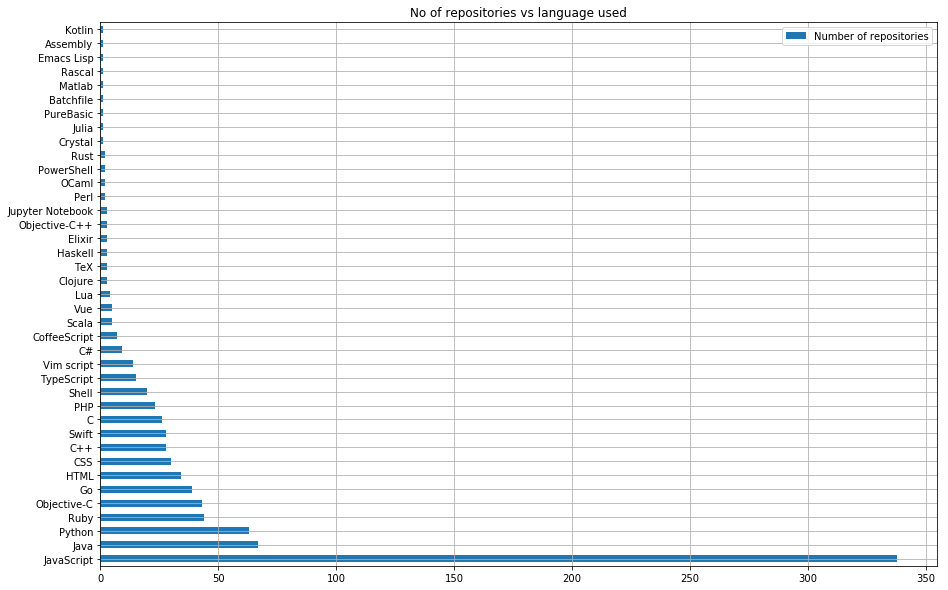

In [279]:
%matplotlib inline
plt.figure()
x.plot(kind='barh',figsize=(15,10),grid=True, label='Number of repositories',legend='No of repos',title='No of repositories vs language used')


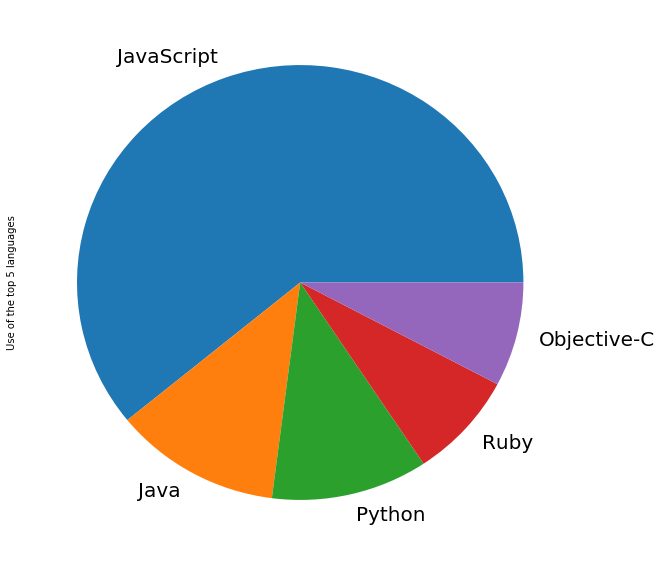

In [294]:
%matplotlib inline
x[:5].plot.pie(label="Use of the top 5 languages",fontsize=20,figsize=(10,10))